In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import scipy.optimize as opt

In [2]:
def z(x, theta):
    return np.dot(x, theta)


def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))  # note outer brackets in denominator are important else it bad/wrong result.


def cost_function(theta, x, y, reg_factor_Lambda):
    m = x.shape[0]
    h = sigmoid(z(x, theta))
    j = (1 / m) * (np.dot(np.log(h).T, -y) - np.dot(np.log(1 - h).T, (1 - y)))

    # Regularization Term
    reg_term = (reg_factor_Lambda * np.dot(theta.T, theta)) / (2 * m)
    # reg_term = (reg_factor_Lambda * sum(theta**2))/(2 * m)
    # Regularized cost
    j = j + reg_term
    return j


def first_deri_j(theta, x, y, reg_factor_Lambda):
    m = x.shape[0]
    h = sigmoid(z(x, theta))
    calculation = np.zeros([m, 1])
    calculation = (1 / m) * np.dot(x.T, (h - y))
    calculation[1:] = calculation[1:] + (reg_factor_Lambda / m) * theta[1:]
    return calculation

In [3]:
def batch_graident_decent(theta, x, y, reg_factor_Lambda, alpha = .03):
    cost_list = list()
    old_cost=0
    change_in_cost = 0
    i = 0
    while i < 4000:
        theta = theta - (alpha*first_deri_j(theta, x, y,reg_factor_Lambda))
        cost = cost_function(theta, x, y, reg_factor_Lambda)
        cost_list.append(cost.item(0,0))
        change_in_cost = cost - old_cost
        old_cost = cost
        i = i + 1
    return theta, i, cost_list

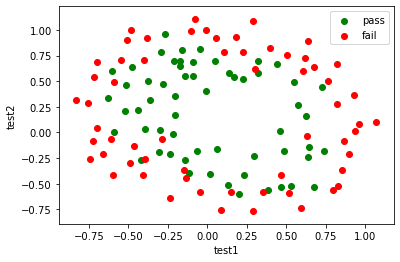

In [4]:
df = pd.read_csv('ex2data2.txt', header=None)
df.columns = ['x1', 'x2', 'y']
mask = df["y"] == 1
x1_pass = df[mask]["x1"]
x2_pass = df[mask]["x2"]
x1_fail = df[~mask]["x1"]
x2_fail = df[~mask]["x2"]
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()

In [5]:

x = df[df.columns[:-1]].values
poly = PolynomialFeatures(6)
x = (poly.fit_transform(x))
"""this has converted (118,2) into (118, 28) . inshrt from 2 dimension  to 28 dimension"""
x

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [6]:
y = df.iloc[:, 2]
# Set the regularization factor to 1
reg_factor_Lambda = 1
(m, n) = x.shape
y = y[:, np.newaxis]
theta = np.zeros((n, 1))

In [7]:
Initial_Cost = cost_function(theta, x, y, reg_factor_Lambda)
print("Initial_Cost =", Initial_Cost)

Initial_Cost = [[0.69314718]]


In [8]:
output = batch_graident_decent(theta, x, y, reg_factor_Lambda)

In [9]:
theta, i, cost_list = output

In [10]:
#print(theta)

In [11]:
Final_Cost = cost_function(theta, x, y, reg_factor_Lambda)
print("Final_Cost =", Final_Cost)

Final_Cost = [[0.53702034]]


In [12]:
# Accuracy of model
prediction = sigmoid(z(x, theta)) >= 0.5
accuracy = np.mean(prediction == y.flatten()) * 100
print("accuracy = {:.2f}%".format(accuracy))
print("theta.shape= ", theta.shape)

accuracy = 49.86%
theta.shape=  (28, 1)


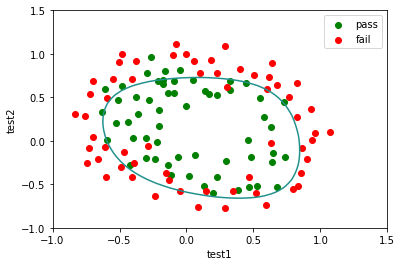

In [13]:
# Decision Boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
poly = PolynomialFeatures(6)
for i in range(len(u)):
    for j in range(len(v)):
        my_array = np.array([[u[i]], [v[j]]]).reshape(1, 2)
        z[i, j] = np.dot(poly.fit_transform(my_array), theta)
plt.scatter(x1_pass, x2_pass, marker="o", color="green", label="pass")
plt.scatter(x1_fail, x2_fail, marker="o", color="red", label="fail")
plt.contour(u, v, z, 0)
plt.legend()
plt.xlabel("test1")
plt.ylabel("test2")
plt.show()